#Analyse books title from WorlCat.org

## Get books information (scrapper)

In [22]:
import requests
import bs4
import os
import pylab as pl
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import re
import matplotlib as mp
import matplotlib.pylab as plt
%matplotlib inline

Scrap data from WorldCat database

In [3]:
def scrap_data(name, num, urltemplate):
    if not os.path.exists(name):
        os.mkdir(name)

    for i in range(1,num,10):
        if os.path.exists(name+"/req"+str(i)):
            continue
        url = urltemplate.format(pagenum=str(i))
        req = requests.get(url)
        with open(name+"/req"+str(i),"wb") as f:
            f.write(req.content)

In [18]:
#Download the files if not already downloaded (use the url produced by wordcast research engine) and templates it

# books with "scientific computing"
name = "wc-scicomputing"
num = 6070 #numbers of titles 
urltemplate = "https://www.worldcat.org/search?q=kw%3A%22scientific+computing%22&fq=x0%3Abook&dblist=638&"+\
    "start={pagenum}&qt=page_number_link"
scrap_data(name, num, urltemplate)
    
# books with "scientific python)
name = "wc-python"
num = 304
urltemplate = "https://www.worldcat.org/search?q=kw%3Ascientific+python&fq=x0%3Abook&dblist=638&start={pagenum}&qt=page_number_link"
scrap_data(name, num, urltemplate)

In [4]:
#Parse information
def get_titles(rep):
    titles = []
    for i in os.listdir(rep):
        if "req" in i:
            with open(rep+"/"+i,"r") as f:
                content = "\n".join(f.readlines())
            page = bs4.BeautifulSoup(content,"html.parser")
            for t in page.find(id="br-table-results").findAll("td", { "class" : "result" }):
                try:
                    titles.append((t.find("strong").contents[0],t.find("span",{"class" : "itemPublisher"}).contents[0]))
                except:
                    titles.append((t.find("strong").contents[0],"NA"))
    print("There is {num} book titles for {repname}".format(num=len(titles),repname=rep))
    return titles

In [5]:
python = get_titles("wc-python")
scicomp = get_titles("wc-scicomputing")

There is 304 book titles for wc-python
There is 6070 book titles for wc-scicomputing


Cleaning data (ad hoc rules)

In [9]:
a = dict(pd.Series([str(i[0]).lower() for i in python]).value_counts())

#repetition from the same title too much
remove = [i for i in a if a[i]>11]

python = [i for i in python if not str(i[0]).lower() in remove]

print("There is {num} book titles".format(num=len(python)))

There is 304 book titles


In [10]:
a = dict(pd.Series([str(i[0]).lower() for i in scicomp]).value_counts())

#repetition from the same title too much
remove = [i for i in a if a[i]>11]

#remove proceedings and explicitly mentionned in the title
scicomp = [i for i in scicomp if not str(i[0]).lower() in remove and "scientific computing" in str(i[0]).lower()\
         and not "proceedings" in str(i[0]).lower()\
         and not "conference" in str(i[0]).lower()\
         and not "workshop" in str(i[0]).lower()\
         and not "symposium" in str(i[0]).lower()]

print("There is {num} book titles".format(num=len(scicomp)))

There is 939 book titles


#Analyse titles

## Evolution  number of books published

### Insight with Google N-gram

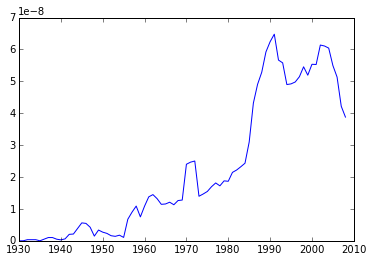

In [62]:
# https://books.google.com/ngrams/graph?content=scientific+computing&year_start=1930&year_end=2008&corpus=15&smoothing=1&share=&direct_url=t1%3B%2Cscientific%20computing%3B%2Cc0
a=  [0.0, 0.0, 3.4695161558554827e-10, 3.4695161558554827e-10, 3.4695161558554827e-10, 0.0, 5.156557773370688e-10, 1.0194078914338434e-09, 1.0194078914338434e-09, 5.0375211409677456e-10, 2.9298698652387617e-10, 5.9675518230643354e-10, 2.0241754383754085e-09, 2.1223283500996595e-09, 3.8772419719279583e-09, 5.6196949686319426e-09, 5.4579962031435043e-09, 4.2551992300114234e-09, 1.4728941029792015e-09, 3.3709237623469335e-09, 2.7133102246483056e-09, 2.3257420989075683e-09, 1.597333358175727e-09, 1.3990620513955794e-09, 1.7620095012678878e-09, 1.0626310202136817e-09, 6.7617900908108668e-09, 8.9724817205668241e-09, 1.0891105794996747e-08, 7.5004972603191309e-09, 1.087119239073786e-08, 1.3782588847988109e-08, 1.4488048686682001e-08, 1.3210601205552544e-08, 1.1440794089878636e-08, 1.1547589551241799e-08, 1.2100773124264682e-08, 1.1308539882293189e-08, 1.2627208612059349e-08, 1.2781045259184035e-08, 2.4005328687811318e-08, 2.4671765667487005e-08, 2.5018773423350165e-08, 1.3970456199293343e-08, 1.4673776268144442e-08, 1.546954978929686e-08, 1.6965617355424456e-08, 1.8141595189054744e-08, 1.7235879390398168e-08, 1.8793308835067062e-08, 1.8667733433138285e-08, 2.1453814132617783e-08, 2.219857483017525e-08, 2.322866343718033e-08, 2.4334533795430009e-08, 3.0973142865301874e-08, 4.3178831177215216e-08, 4.9049395064078759e-08, 5.2860117468374788e-08, 5.9221722636948471e-08, 6.2433854234692873e-08, 6.4799046128882765e-08, 5.6681023134312149e-08, 5.5802830208525243e-08, 4.9005915769839703e-08, 4.9211746973772584e-08, 4.9806985202849319e-08, 5.1457671901289359e-08, 5.456425948106395e-08, 5.1941514792967304e-08, 5.5361535800102502e-08, 5.5291312861527331e-08, 6.139100131955881e-08, 6.1094646971090086e-08, 6.0430933738568157e-08, 5.4970995459295104e-08, 5.1347556725052833e-08, 4.2185427891657433e-08, 3.8798637191916896e-08]
pl.plot(range(1930, 2009),a)

In [78]:
def plot_titles(titles,title,vmin=1900,vmax=2015):
    years = []
    texts2 = []
    for i in titles:
        try:
            t = re.findall("([0-9]{4})",i[1])
        except:
            t="na"
        if len(t)>0 and t != "na":
            years.append(int(t[0]))
            texts2.append((i[0],t[0]))
        else:
            texts2.append((i[0],0))

    a = pd.Series([i for i in years if i<vmax and i>vmin])
    b = a.hist(bins=40)
    pl.title(title)
    plt.xlim((vmin,vmax))
    pl.xlabel("Year of publication")

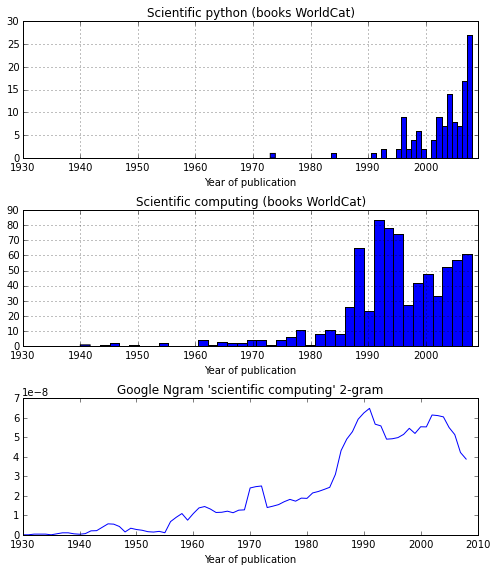

In [79]:
plt.figure(figsize=(7,8))
plt.subplot(311)
plot_titles(python,"Scientific python (books WorldCat)",1930,2009)
plt.subplot(312)
plot_titles(scicomp,"Scientific computing (books WorldCat)",1930,2009)
plt.subplot(313)
pl.plot(range(1930, 2009),a)
pl.title("Google Ngram 'scientific computing' 2-gram")
pl.xlabel("Year of publication")
plt.tight_layout()
plt.savefig("books-worldcat.png")

**Analysis**
*The analysis of trend (either Google Ngram or WorldCat) shows a bimodal distribution of books on computational sciences : we can make the hypothesis that "scientific computing" went through two different era*

## Words analysis of titles

In [104]:
def analyse_titles(titles,sep=2000):
    corpus = []
    for i in titles:
        try:
            t = re.findall("([0-9]{4})",i[1])
        except:
            t="na"
        if len(t)>0 and t != "na":
            corpus.append((i[0],t[0]))
        else:
            corpus.append((i[0],0))

    corpus = [i for i in corpus if len(str(i[0]).split())<30] #lengths max of titles

    stoplist = stopwords.words('english') + list(string.punctuation) #stoplist

    corpus = [([word.replace(" ","").replace(".","").replace(",","").replace("(","").replace(")","")\
                     .replace('"',"").replace("]","").replace("[","")\
              for word in str(document[0]).lower().split() if word not in stoplist],document[1])
              for document in corpus] #remove words from stoplist

    #remove one time words
    l = pd.Series([i for j in corpus for i in j[0]])
    t = dict(l.value_counts())
    adhocfilter = [u for u in t if t[u]<2] + ['1','2',"'88","3","4"]
    w = [u for u in t if not u in adhocfilter]

    porter_stemmer = PorterStemmer() #stemmer
    corpus = [([porter_stemmer.stem(token) for token in text[0] if token in w],text[1])
              for text in corpus]

    #corpus = [([token for token in text[0] if token in w],text[1])
    #          for text in corpus]


    corpus_all = [i[0] for i in corpus]
    corpus_t1 = [i[0] for i in corpus if int(i[1])<sep]
    corpus_t2 = [i[0] for i in corpus if int(i[1])>=sep]
    
    return corpus_all,corpus_t1,corpus_t2

Words used in the title regarding each period

In [109]:
n = 30
tall,tt1,tt2 = analyse_titles(scicomp,1995)
data_words = pd.DataFrame()
data_words["all"] = pd.Series([j for i in tall for j in i]).value_counts()[0:n]
data_words["all-percent"] = pd.Series([j for i in tall for j in i]).value_counts()[0:n]*round(100/len(tall),2)
data_words["t1"] = pd.Series([j for i in tt1 for j in i]).value_counts()[0:n]
data_words["t1-percent"] = pd.Series([j for i in tt1 for j in i]).value_counts()[0:n]*round(100/len(tt1),2)
data_words["t2"] = pd.Series([j for i in tt2 for j in i]).value_counts()[0:n]
data_words["t2-percent"] = pd.Series([j for i in tt2 for j in i]).value_counts()[0:n]*round(100/len(tt2),2)
data_words

,all,all-percent,t1,t1-percent,t2,t2-percent
comput,996,109.56,413,107.38,583,110.77
scientif,945,103.95,398,103.48,547,103.93
numer,194,21.34,74,19.24,120,22.80
parallel,95,10.45,32,8.32,63,11.97
analysi,71,7.81,23,5.98,48,9.12
part,70,7.70,31,8.06,39,7.41
applic,68,7.48,16,4.16,52,9.88
recip,67,7.37,44,11.44,23,4.37
art,67,7.37,41,10.66,26,4.94
method,66,7.26,17,4.42,49,9.31


##Network between words

In [360]:
import networkx as nx
import itertools as it
import math
from IPython.html import widgets
from IPython.display import display
from d3networkx import ForceDirectedGraph, EventfulGraph

In [382]:
#Create Graph
G = nx.Graph()
for i in [text for text in texts_all if len(text)<10]:
    for j in i:
        if j in G.node:
            G.node[j]["r"]+=1
        else:
            G.add_node(j,label=j,r=1, font_size='10pt',charge=-200)
    for j in list(it.combinations(i,2)):
        if j in G.edges():
            G[j[0]][j[1]]["weight"]+=1
            G[j[0]][j[1]]["strength"]+=1
            #G[j[0]][j[1]]["strokewidth"]=str(G[j[0]][j[1]]["strength"])+"px"
        else:
            G.add_edge(j[0],j[1],weight=1, stroke="#000000", strokewidth="1px", strength=0.3)

In [ ]:
#Export to a file in order to be analysed by a third party software as Gephi
nx.write_graphml(G,"network-titles-books-scientificcomputing.graphml","utf-8")

In [354]:
#visualisation direct widget (doesn't work for the moment)
def create_widget(graph):
    display(ForceDirectedGraph(graph))
EventfulGraph.on_constructed(create_widget)

In [383]:
H = G.copy()
H.remove_nodes_from([i for i in H.node if H.node[i]["r"]<10])
for i in H.node:
    H.node[i]["r"] = math.log10(H.node[i]["r"])
D = EventfulGraph(H)
d3 = ForceDirectedGraph(D)
d3.width = 1000
d3.height = 1000
display(d3)